In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [3]:
# Creating path
path = r'C:\Users\nickr\OneDrive\Documents\Nick Bootcamp\Machine Learning\Data Sets'

In [5]:
pleasant = pd.read_csv(os.path.join(path, 'Weather_Prediction_Pleasant_Weather.csv'))

In [7]:
climate = pd.read_csv(os.path.join(path, 'unscaled_cleaned_weather_dated.csv'), index_col = False)

In [9]:
# Reducing data set to Stockholm station only
# Create a list of the columns containing Stockholm in their names

stockholm_list = list(x for x in climate.columns if x.find('STOCKHOLM') >=0)
stockholm_list

['STOCKHOLM_cloud_cover',
 'STOCKHOLM_humidity',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']

In [13]:
# Creating a dataframe with those columns

df_stockholm = climate[stockholm_list]
df_stockholm

,STOCKHOLM_cloud_cover,STOCKHOLM_humidity,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max
0,5,0.98,1.0114,0.05,0.32,0.0,4.2,2.2,4.9
1,5,0.62,1.0114,0.05,0.06,0.0,4.0,3.0,5.0
2,5,0.69,1.0114,0.05,0.02,0.0,2.4,1.3,4.1
3,5,0.98,1.0114,0.05,0.00,0.0,1.2,0.4,2.3
4,5,0.96,1.0114,0.05,1.32,0.0,3.3,0.8,4.3
...,...,...,...,...,...,...,...,...,...
22945,5,0.98,1.0161,1.11,0.14,3.2,11.5,8.2,14.2
22946,5,1.00,1.0122,1.11,0.14,0.8,12.5,11.0,14.3
22947,5,0.85,1.0059,1.11,0.14,6.9,13.1,12.1,14.4
22948,5,0.94,1.0160,1.11,0.14,8.4,7.5,5.1,12.4


In [15]:
# Reducing pleasant dataset to Stockholm only

pleasant_stockholm = pleasant['STOCKHOLM_pleasant_weather']
pleasant_stockholm

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: STOCKHOLM_pleasant_weather, Length: 22950, dtype: int64

In [17]:
df_stockholm.shape

(22950, 9)

In [19]:
pleasant_stockholm.shape

(22950,)

In [21]:
# Reshaping for modeling
# Turn X2 and y2 from df to arrays

X = np.array(df_stockholm)
y = np.array(pleasant_stockholm)

In [23]:
X.shape

(22950, 9)

In [25]:
y.shape

(22950,)

In [27]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


In [31]:
X_train

array([[  5.    ,   0.48  ,   1.0192, ...,   8.5   ,   5.    ,  11.9   ],
       [  5.    ,   0.88  ,   1.0076, ...,  -6.9   ,  -9.4   ,  -4.6   ],
       [  7.    ,   0.77  ,   1.0134, ...,  -8.3   , -13.3   ,  -5.5   ],
       ...,
       [  8.    ,   0.72  ,   1.0033, ...,   7.5   ,   5.4   ,  10.    ],
       [  8.    ,   0.78  ,   1.0121, ...,   8.6   ,   6.1   ,  13.2   ],
       [  6.    ,   0.48  ,   1.0148, ...,   1.    ,  -0.1   ,   4.    ]])

In [33]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
X_test

array([[ 5.    ,  0.85  ,  0.9971, ..., 14.8   , 12.6   , 17.5   ],
       [ 1.    ,  0.71  ,  1.0397, ..., -2.    , -4.2   ,  0.9   ],
       [ 8.    ,  0.87  ,  1.0048, ..., 18.3   , 15.9   , 22.6   ],
       ...,
       [ 8.    ,  0.89  ,  1.0214, ...,  9.1   ,  7.9   , 11.2   ],
       [ 6.    ,  0.75  ,  1.018 , ..., -0.4   , -5.    ,  3.    ],
       [ 8.    ,  0.54  ,  1.0124, ..., 11.9   ,  9.8   , 15.9   ]])

In [37]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
# Grid search
# Create a RF classifier

clf = RandomForestClassifier()

In [41]:
# Grid search cv
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }

In [43]:
start = time.time()
grid = GridSearchCV(clf, param_grid=grid_space, cv=3, scoring='accuracy', verbose=3, n_jobs=-1)
model_grid = grid.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Search took 4.7400109688440955 minutes


In [45]:
# Print grid search results

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0


In [47]:
# Random search
# Define random search cv

rs_space={'max_depth':list(np.arange(10, 100, step=10)) + [None],
              'n_estimators':np.arange(10, 500, step=50),
              'max_features':randint(1,7),
              'criterion':['gini','entropy'],
              'min_samples_leaf':randint(1,4),
              'min_samples_split':np.arange(2, 10, step=2)
         }

In [49]:
# Create a RF classifier

clf2= RandomForestClassifier()

In [51]:
start = time.time()
rf_random = RandomizedSearchCV(clf2, rs_space, n_iter=200, scoring='accuracy', verbose=3, n_jobs=-1, cv=3)
model_random = rf_random.fit(X_train, y_train)
print('Search took %s minutes' % ((time.time() - start)/60))

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Search took 8.859397387504577 minutes


In [53]:
# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [55]:
# Grid search results vs.

print('Best GRID search hyperparameters are: '+str(model_grid.best_params_))
print('Best GRID search score is: '+str(model_grid.best_score_))

# Random random search results

print('Best RANDOM search hyperparameters are: '+str(model_random.best_params_))
print('Best RANDOM search score is: '+str(model_random.best_score_))

Best GRID search hyperparameters are: {'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
Best GRID search score is: 1.0
Best RANDOM search hyperparameters are: {'criterion': 'gini', 'max_depth': 60, 'max_features': 5, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 360}
Best RANDOM search score is: 1.0


In [57]:
# Running random search with best set parameters
# Create a RF classifier with the RANDOM search results
clf3 = RandomForestClassifier(n_estimators = 110, max_depth=60, max_features=6, min_samples_leaf=3, min_samples_split=4, criterion = 'gini')  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=60, max_features=6, min_samples_leaf=3,
                       min_samples_split=4, n_estimators=110)

In [59]:
# Perform predictions on the test dataset
y_pred3 = clf3.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred3))

Model Accuracy:  1.0


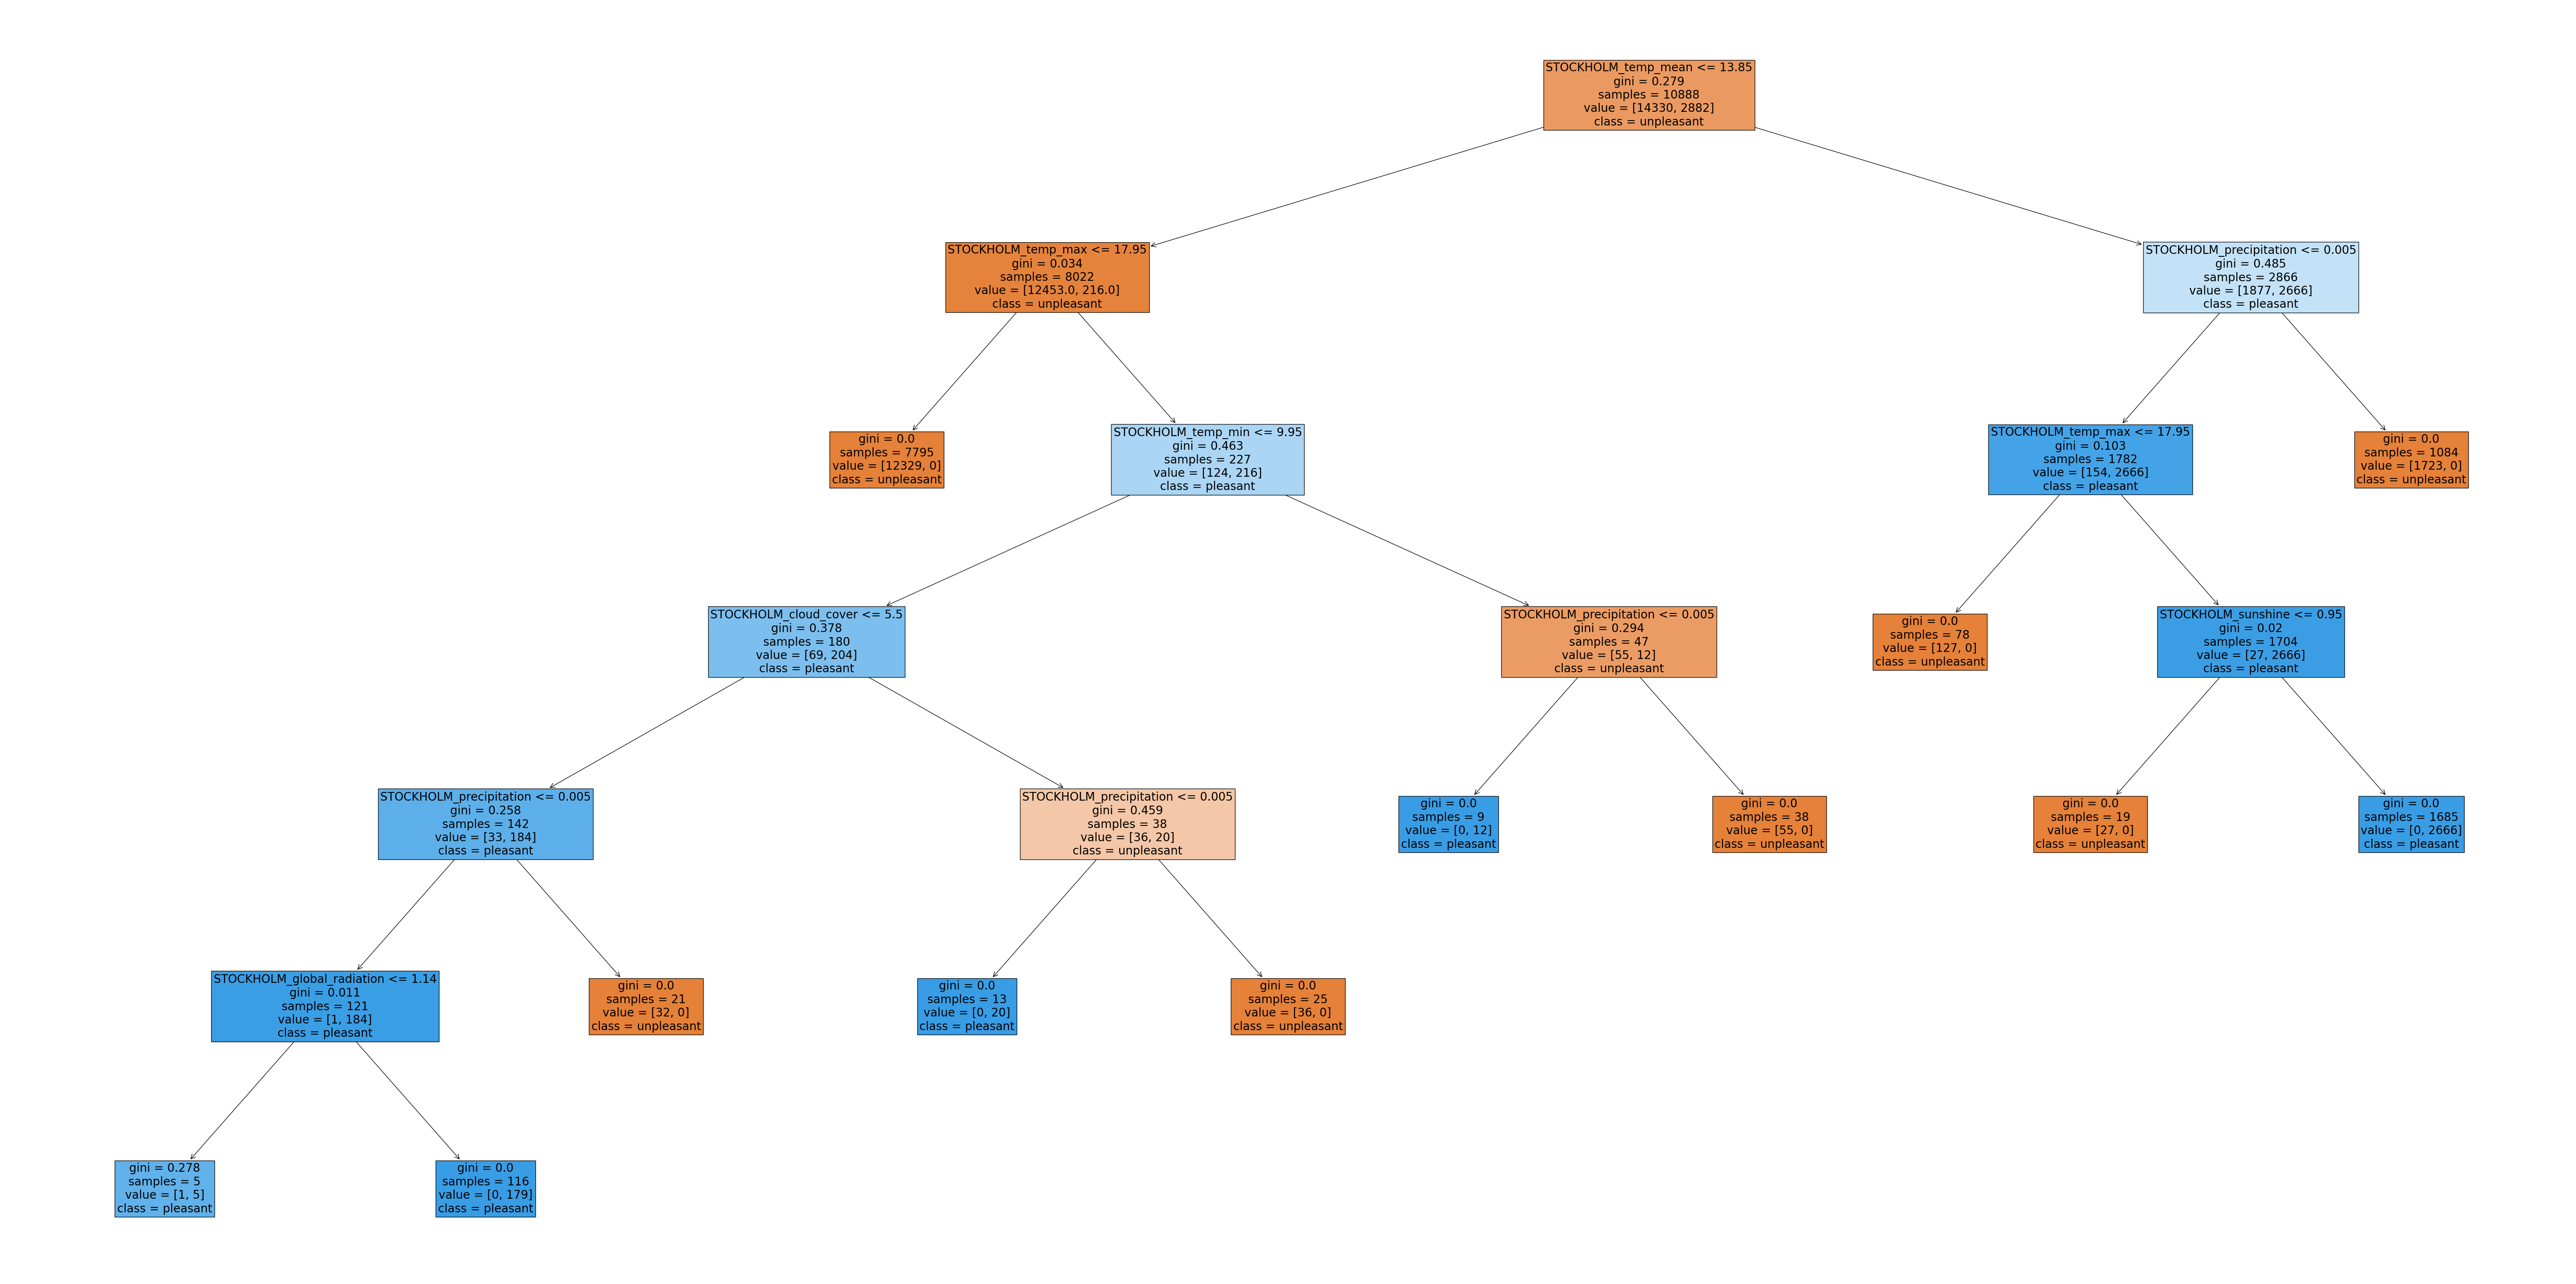

In [63]:
# Plot a tree from the selected random forest
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf3.estimators_[6], fontsize = 20, feature_names = df_stockholm.columns, class_names=['unpleasant', 'pleasant'], filled=True);

In [65]:
fig.savefig(os.path.join(path, 'Visualizations', 'optimized_random_forest_Stockholm.png'),bbox_inches='tight')

In [67]:
# Discovering Feature Importances
# Retrieve feature importances from the trained model

newarray = clf3.feature_importances_
print(clf3.feature_importances_.shape)
newarray

(9,)


array([2.90856203e-03, 9.21744891e-05, 2.17296869e-03, 4.63959284e-02,
       3.67045116e-01, 4.39422988e-02, 1.34996871e-01, 7.68890941e-03,
       3.94757172e-01])

In [71]:
# Create a list of weather features

wx_list = [feature.replace('STOCKHOLM_', '') for feature in stockholm_list]
wx_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [73]:
important = pd.Series(newarray, index = wx_list)
important

cloud_cover         0.002909
humidity            0.000092
pressure            0.002173
global_radiation    0.046396
precipitation       0.367045
sunshine            0.043942
temp_mean           0.134997
temp_min            0.007689
temp_max            0.394757
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


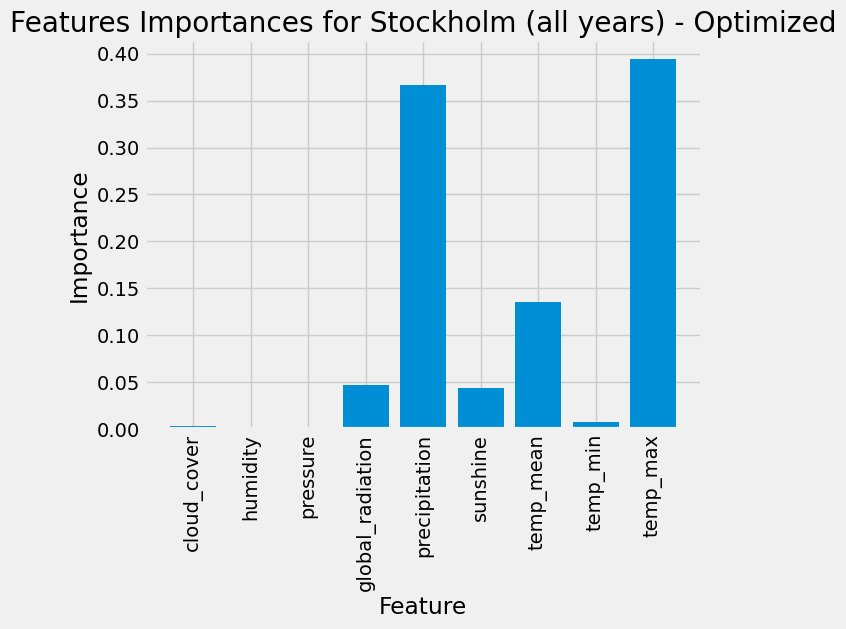

In [75]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(wx_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, wx_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Stockholm (all years) - Optimized');

plt.savefig(os.path.join(path, 'Visualizations', 'Stockholm_feature_importances_optimized.png'), bbox_inches='tight')
plt.show()